In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
import pandas as pd
import numpy as np

# Your dictionary
data = {
    0: {
        "err": 0.0038,
        "ll": -0.01173224113881588,
        "brier": 0.006129945162683725,
        "ece": np.float64(0.0006425653993608608),
    },
    30: {
        "err": 0.0773,
        "ll": -0.2487705498933792,
        "brier": 0.11708074063062668,
        "ece": np.float64(0.026423105323346508),
    },
    60: {
        "err": 0.6029,
        "ll": -3.0793704986572266,
        "brier": 0.9861230254173279,
        "ece": np.float64(0.4324764236390778),
    },
    90: {
        "err": 0.8349,
        "ll": -5.628232002258301,
        "brier": 1.370338797569275,
        "ece": np.float64(0.6289716509401897),
    },
    120: {
        "err": 0.7611,
        "ll": -6.025223255157471,
        "brier": 1.271274209022522,
        "ece": np.float64(0.5736376384884246),
    },
    150: {
        "err": 0.6159,
        "ll": -6.054227352142334,
        "brier": 1.0640801191329956,
        "ece": np.float64(0.48474987874926767),
    },
    180: {
        "err": 0.5631,
        "ll": -6.6125311851501465,
        "brier": 1.0054073333740234,
        "ece": np.float64(0.46887927760929715),
    },
}

# Create lists for each column
rotation = list(data.keys())
err = [data[r]["err"] for r in rotation]
ll = [data[r]["ll"] for r in rotation]
brier = [data[r]["brier"] for r in rotation]
ece = [data[r]["ece"] for r in rotation]
method = ["SNR"] * len(rotation)  # "SNR" for all rows

# Create the DataFrame
df2 = pd.DataFrame({
    "method": method,
    "rotation": rotation,
    "ll": ll,
    "err": err,
    "brier": brier,
    "ece": ece,
})

display(df2)


,method,rotation,ll,err,brier,ece
0,SNR,0,-0.011732,0.0038,0.006130,0.000643
1,SNR,30,-0.248771,0.0773,0.117081,0.026423
2,SNR,60,-3.079370,0.6029,0.986123,0.432476
3,SNR,90,-5.628232,0.8349,1.370339,0.628972
4,SNR,120,-6.025223,0.7611,1.271274,0.573638
5,SNR,150,-6.054227,0.6159,1.064080,0.484750
6,SNR,180,-6.612531,0.5631,1.005407,0.468879


In [63]:
df = pd.concat([pd.read_csv('Results_.csv')[['method', 'rotation', 'err', 'll', 'brier', 'ece']],
               df2[['method', 'rotation', 'err', 'll', 'brier', 'ece']]] )
df

,method,rotation,err,ll,brier,ece
0,MAP,0,0.0055,-0.017919,0.008828,0.001297
1,MAP,30,0.0916,-0.317241,0.142648,0.039864
2,MAP,60,0.6238,-3.433685,1.032552,0.459178
3,MAP,90,0.8357,-6.069594,1.399243,0.640741
4,MAP,120,0.7754,-6.582309,1.305964,0.593431
...,...,...,...,...,...,...
2,SNR,60,0.6029,-3.079370,0.986123,0.432476
3,SNR,90,0.8349,-5.628232,1.370339,0.628972
4,SNR,120,0.7611,-6.025223,1.271274,0.573638
5,SNR,150,0.6159,-6.054227,1.064080,0.484750


In [64]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

def create_plot(pivot_table, error_metric='error_metric'):
    # 1. Reset the index of the pivot table to make 'method' a column
    df_plot = pivot_table.reset_index()
    
    # 2. Melt the DataFrame to long format, which is suitable for seaborn
    df_melted = df_plot.melt(
        id_vars="method",  # Keep 'method' as an identifier variable
        value_vars=pivot_table.columns,  # Use the rotation angles as value variables
        var_name="rotation",  # Name for the new column containing rotation angles
        value_name=error_metric,  # Name for the new column containing error values
    )
    
    # Convert 'rotation' column to numeric.
    df_melted['rotation'] = pd.to_numeric(df_melted['rotation'])
    
    # 3. Create the line plot using seaborn
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    sns.lineplot(
        x="rotation",  # Rotation angles on the x-axis
        y=error_metric,  # Error metric on the y-axis
        hue="method",  # Different lines for each method
        data=df_melted,  # Use the melted DataFrame
        marker='o',  # Add markers to the lines
    )
    plt.title("Error Metric vs. Rotation Angle by Method")
    plt.xlabel("Rotation Angle (degrees)")  # Label the x-axis
    plt.ylabel(error_metric)  # Label the y-axis
    plt.grid(True)  # Add gridlines for better readability
    plt.legend(title="Method")  # Add a legend with the title "Method"
    plt.show()

def create_heatmap(pivot_table, metric='err'):
    # Create a heatmap of the pivot table
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    sns.heatmap(pivot_table, annot=True, cmap='Reds')  # 'annot=True' displays cell values, 'cmap' sets the color map
    plt.title(f'{metric} Heatmap by Method and Rotation')
    plt.xlabel('Rotation')
    plt.ylabel('Method')
    plt.show()

In [65]:
df[df['method']=='MAP']

,method,rotation,err,ll,brier,ece
0,MAP,0,0.0055,-0.017919,0.008828,0.001297
1,MAP,30,0.0916,-0.317241,0.142648,0.039864
2,MAP,60,0.6238,-3.433685,1.032552,0.459178
3,MAP,90,0.8357,-6.069594,1.399243,0.640741
4,MAP,120,0.7754,-6.582309,1.305964,0.593431
5,MAP,150,0.6263,-6.086036,1.066793,0.477981
6,MAP,180,0.5472,-6.643351,0.972940,0.445842


In [66]:
df.columns

Index(['method', 'rotation', 'err', 'll', 'brier', 'ece'], dtype='object')

In [67]:
df.method.unique()

array(['MAP', 'subnetwork_inference', 'layer_aware_subnet',
       'layer_aware_subnet_0.7', 'layer_aware_subnet_0.5',
       'layer_aware_subnet_fwd_0.9', 'random', 'magnitude',
       'subnetwork_inference_2', 'subnetwork_inference_3',
       'subnetwork_inference_4', 'SNR'], dtype=object)

In [68]:
df_orig = df.copy()


In [79]:
# df = df_orig.copy()

In [80]:
df = df[df['method'].isin(['MAP', 'layer_aware_subnet', 'subnetwork_inference',
                           'subnetwork_inference_3',
                           #'random', 'magnitude', 
                           'SNR' ])]

In [81]:
df['method'] = df['method'].map({'subnetwork_inference': 'subnet_5000',
                                'subnetwork_inference_3' : 'subnet_10000',
                                'layer_aware_subnet' : 'layer_aware_subnet_5000',
                                'MAP':'MAP',
                                'SNR':'SNR',
                                'random':'random',
                                'magnitude':'magnitude'})

### Error

rotation,0,30,60,90,120,150,180
method,,,,,,,
MAP,0.0055,0.0916,0.6238,0.8357,0.7754,0.6263,0.5472
SNR,0.0038,0.0773,0.6029,0.8349,0.7611,0.6159,0.5631
layer_aware_subnet_5000,0.0057,0.0884,0.6217,0.8346,0.7747,0.6281,0.5473
subnet_10000,0.0060,0.0906,0.6220,0.8369,0.7732,0.6289,0.5519
subnet_5000,0.0062,0.0899,0.6224,0.8374,0.7744,0.6266,0.5496


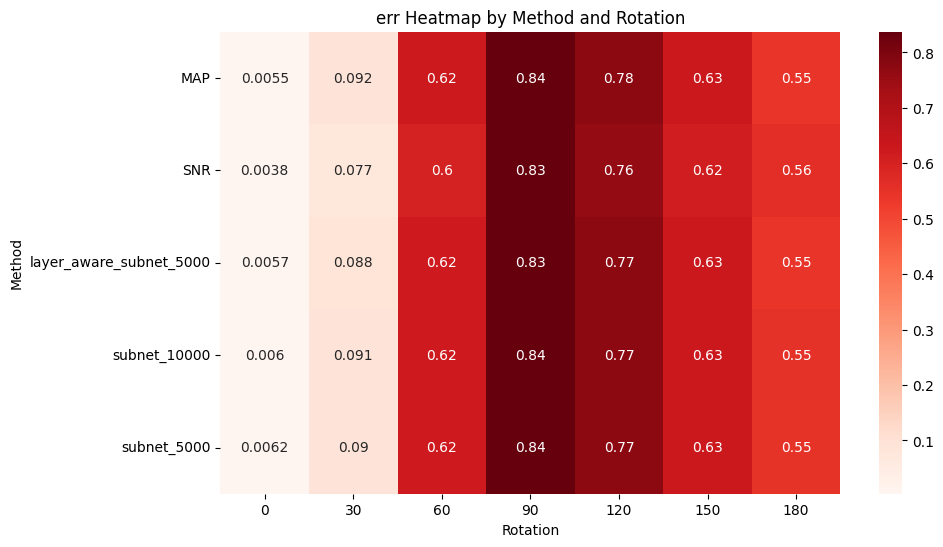

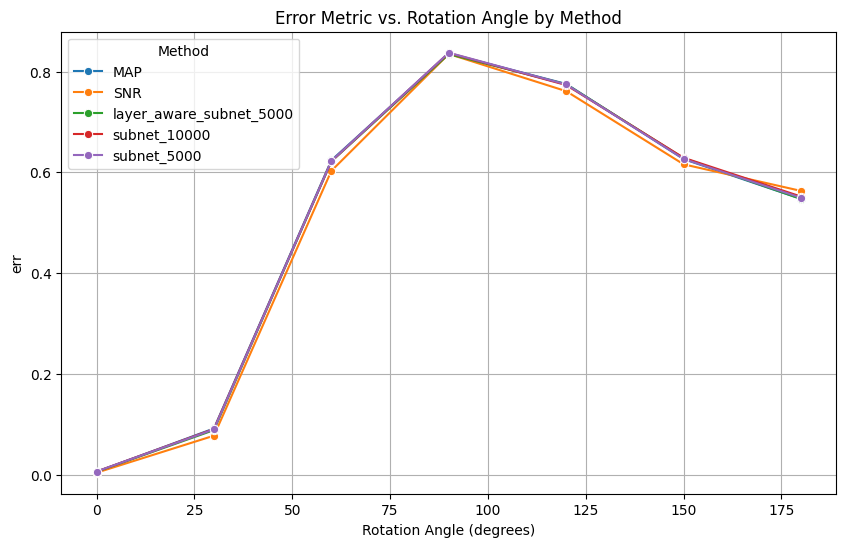

In [82]:
values = 'err'

pivot_table= df.pivot_table(
    index='method',     
    columns='rotation', 
    values=values        
)

# Print the pivot table
display(pivot_table)

create_heatmap(pivot_table, metric='err')

create_plot(pivot_table, error_metric='err')

### Likelihood

rotation,0,30,60,90,120,150,180
method,,,,,,,
MAP,-0.017919,-0.317241,-3.433685,-6.069594,-6.582309,-6.086036,-6.643351
SNR,-0.011732,-0.248771,-3.079370,-5.628232,-6.025223,-6.054227,-6.612531
layer_aware_subnet_5000,-0.017679,-0.283406,-2.917468,-5.115682,-5.551659,-5.179980,-5.658020
subnet_10000,-0.017748,-0.285804,-2.931198,-5.117959,-5.563362,-5.178086,-5.657055
subnet_5000,-0.018696,-0.287285,-2.928040,-5.109302,-5.557508,-5.172565,-5.653650


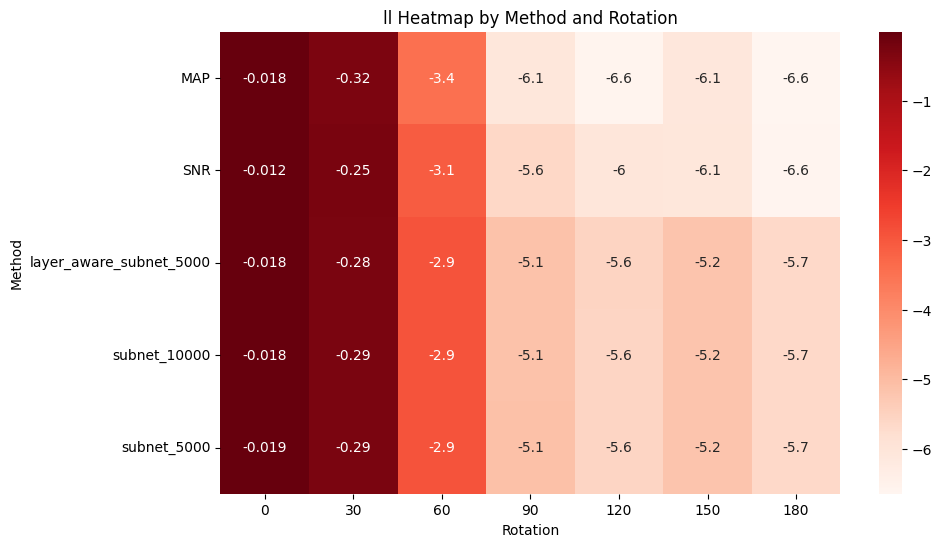

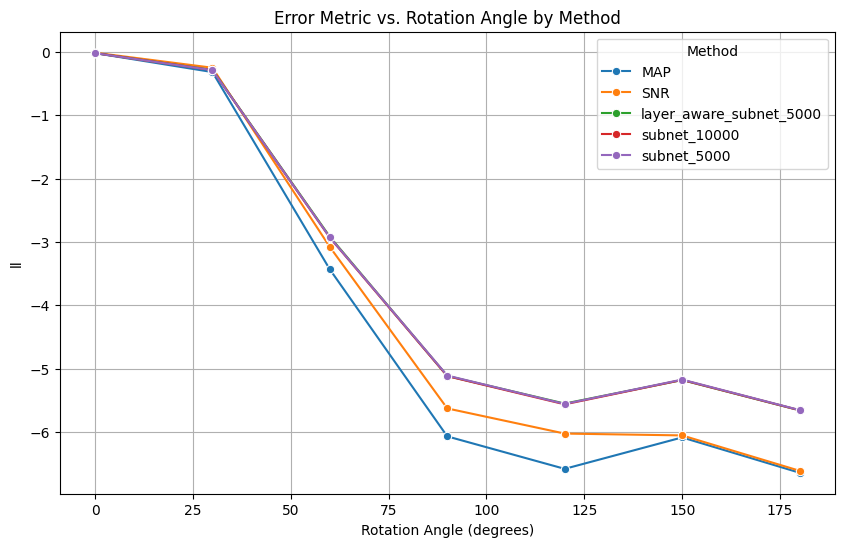

In [83]:
values = 'll'

pivot_table= df.pivot_table(
    index='method',     
    columns='rotation', 
    values=values        
)

# Print the pivot table
display(pivot_table)

create_heatmap(pivot_table, metric=values)

create_plot(pivot_table, error_metric=values)

### Brier

rotation,0,30,60,90,120,150,180
method,,,,,,,
MAP,0.008828,0.142648,1.032552,1.399243,1.305964,1.066793,0.972940
SNR,0.006130,0.117081,0.986123,1.370339,1.271274,1.064080,1.005407
layer_aware_subnet_5000,0.008741,0.133934,0.987078,1.343130,1.260057,1.036106,0.951313
subnet_10000,0.008844,0.135074,0.991517,1.341100,1.259547,1.035317,0.951449
subnet_5000,0.009396,0.135897,0.989387,1.341395,1.259401,1.034078,0.951744


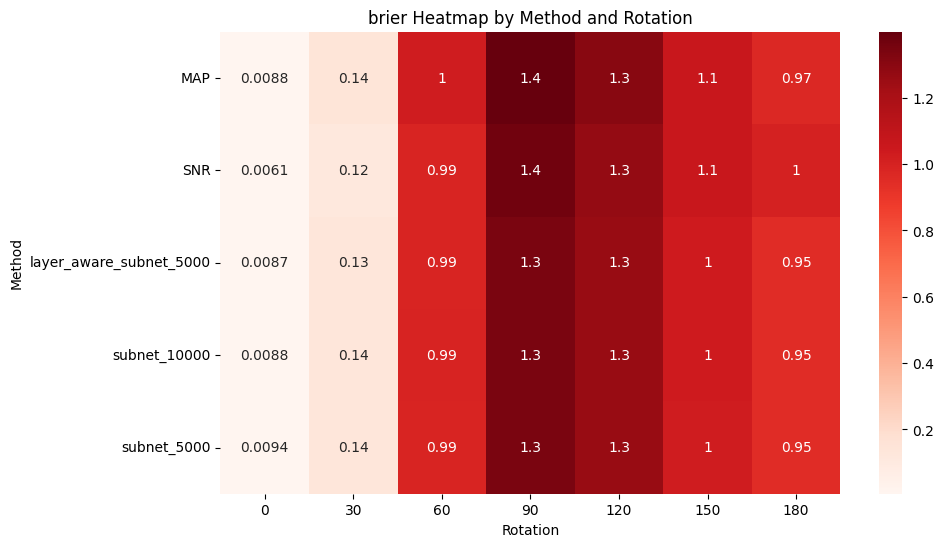

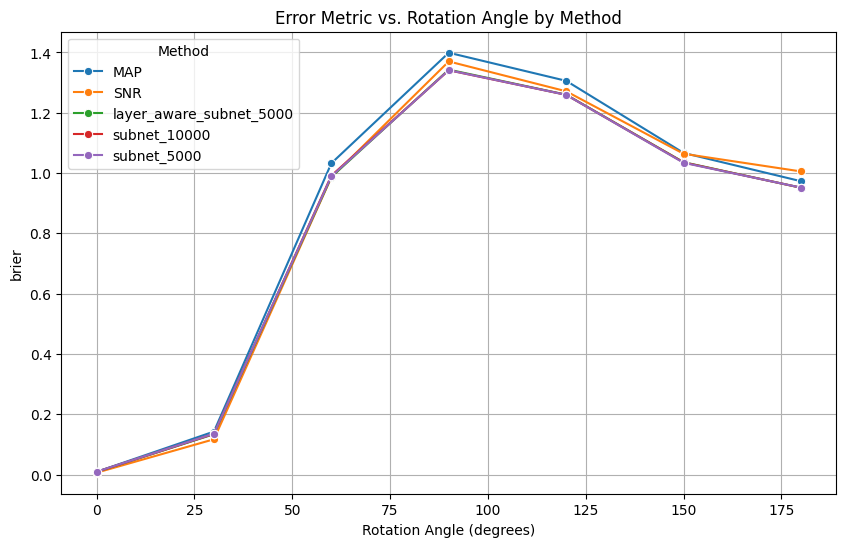

In [84]:
values = 'brier'

pivot_table= df.pivot_table(
    index='method',     
    columns='rotation', 
    values=values        
)

# Print the pivot table
display(pivot_table)

create_heatmap(pivot_table, metric=values)

create_plot(pivot_table, error_metric=values)

**Comment:**
- The Brier score measures the accuracy of probabilistic predictions. It calculates the mean squared difference between the predicted probability and the actual outcome (0 or 1 for binary classification; 0 or a vector for multiclass).
- A lower Brier score indicates better performance. The best possible Brier score is 0, and the worst is 1.

### ECE

rotation,0,30,60,90,120,150,180
method,,,,,,,
MAP,0.001297,0.039864,0.459178,0.640741,0.593431,0.477981,0.445842
SNR,0.000643,0.026423,0.432476,0.628972,0.573638,0.484750,0.468879
layer_aware_subnet_5000,0.002015,0.022936,0.421727,0.597693,0.554094,0.448364,0.423780
subnet_10000,0.001899,0.025325,0.421942,0.597862,0.552783,0.448837,0.426882
subnet_5000,0.002031,0.025795,0.422582,0.599124,0.552398,0.446793,0.426492


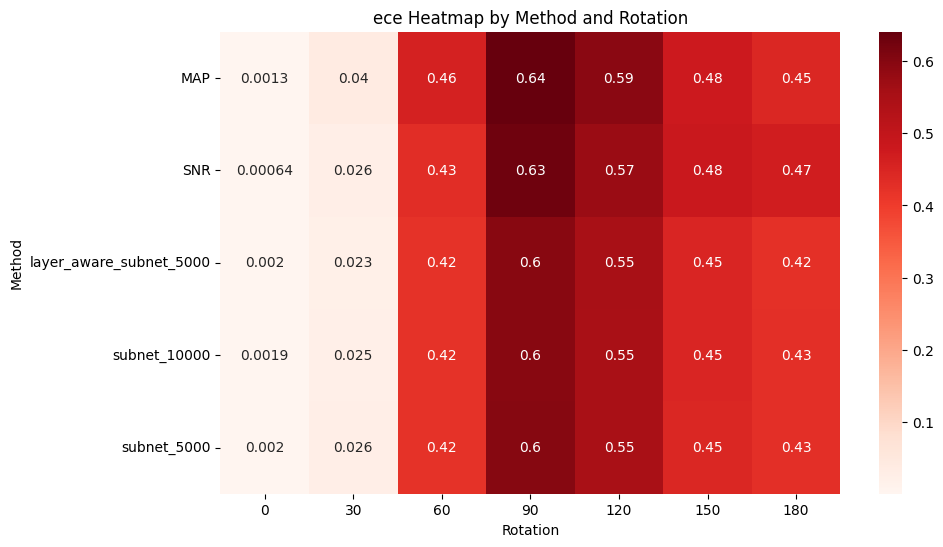

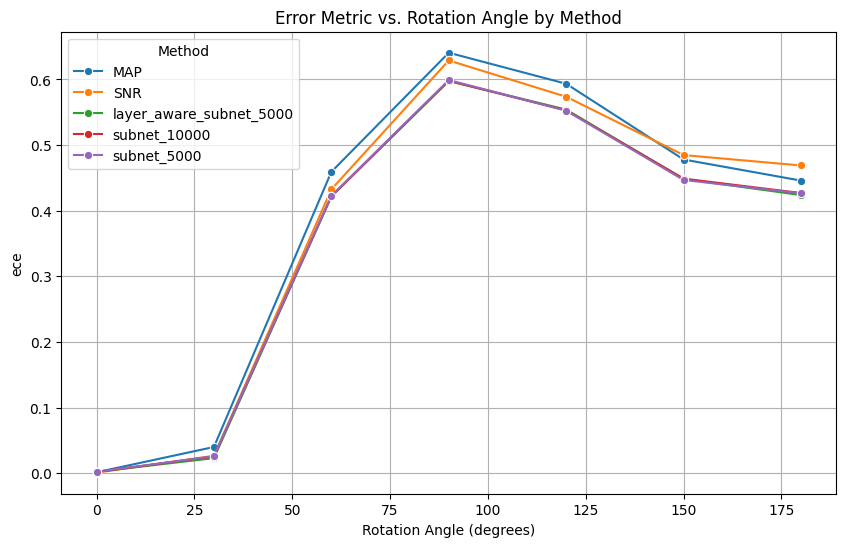

In [85]:
values = 'ece'

pivot_table= df.pivot_table(
    index='method',     
    columns='rotation', 
    values=values        
)

# Print the pivot table
display(pivot_table)

create_heatmap(pivot_table, metric=values)

create_plot(pivot_table, error_metric=values)

**Comment:**
- ECE measures how well a model's predicted probabilities match the true probabilities across different confidence levels. It quantifies the difference between the model's confidence and its accuracy.
- A lower ECE indicates better calibration. A perfectly calibrated model has an ECE of 0.